In [1]:
# Library
import pandas as pd
import zipfile
import pickle


### Read sheets as a dictionary

In [2]:
#Unzip Data
with zipfile.ZipFile('df_dic.zip', 'r') as myzip:
    myzip.extractall('')


# Open the file in binary mode 
with open('df_dic.pkl', 'rb') as file: 
     
    # Call load method to deserialze 
    df_dic = pickle.load(file) 

### Obtaining costs ==>

In [3]:
s_part = ["S01","S02","S03","S04","S05","S06","S07","S08","S09","S10","S11","S12","S13","S14"]

#### 98

In [4]:
R_data = df_dic["R98Data"].copy()
R_data.set_index(['Address'], inplace=True)
R_data = R_data[['Takmil','Jaygozin']]
U_data = df_dic["U1399Data"].copy()
U_data.set_index(['Address'], inplace=True)
U_data = U_data[['Takmil','Jaygozin']]

In [5]:
U_data , R_data

(             Takmil  Jaygozin
 Address                      
 10001000108       1       NaN
 10001000111       2       1.0
 10001000114       2       1.0
 10001000117       2       1.0
 10001000120       1       NaN
 ...             ...       ...
 13006383810       2       NaN
 13006383814       2       1.0
 13006383815       1       NaN
 13006383820       2       1.0
 13006383823       2       1.0
 
 [19898 rows x 2 columns],
              Takmil  Jaygozin
 Address                      
 20001383908       1       NaN
 20001383911       2       1.0
 20001383915       2       1.0
 20001383916       1       NaN
 20001383920       2       1.0
 ...             ...       ...
 23006709717       2       1.0
 23006709720       2       1.0
 23006709723       1       NaN
 23006709807       1       NaN
 23006709818       2       1.0
 
 [18430 rows x 2 columns])

In [6]:
R_values_98 = []
U_values_98 = []
for i in s_part:
    R_df = df_dic[ 'R1399P3'+ i ]
    R_df = R_df.groupby('Address').sum()
    R_value = R_df["value"]

    R_values_98.append(R_value)


    U_df = df_dic[ 'R1399P3'+ i ]
    U_df = U_df.groupby('Address').sum()
    U_value = U_df["value"]

    U_values_98.append(U_value)

In [7]:
R_values_98.append(R_data)
U_values_98.append(U_data)

In [8]:
df_R_values_98 = pd.concat(R_values_98, axis=1)
df_U_values_98 = pd.concat(U_values_98, axis=1)

In [9]:
#start filtering : [ if takmil is 1 or jaygozin is 1 ]
df_R_values_98 = df_R_values_98 [(df_R_values_98["Takmil"] == 1) | (df_R_values_98["Jaygozin"] == 1)]
df_U_values_98 = df_U_values_98 [(df_U_values_98["Takmil"] == 1) | (df_U_values_98["Jaygozin"] == 1)]

In [10]:
# drope the column takmil and jaygozin , because we dont nead them any more .
df_R_values_98 = df_R_values_98.drop(["Jaygozin","Takmil"] , axis=1)
df_U_values_98 = df_U_values_98.drop(["Jaygozin","Takmil"] , axis=1)

In [11]:
# we sum all values .
df_R_values_sum_98 = pd.DataFrame( (df_R_values_98.sum(axis=1 , numeric_only=True)) ,columns=["total value 98"])
df_U_values_sum_98 = pd.DataFrame( (df_U_values_98.sum(axis=1 , numeric_only=True)) ,columns=["total value 98"])

In [12]:
# remove the row that are 0 .
df_R_values_sum_98 = df_R_values_sum_98 [df_R_values_sum_98["total value 98"] != 0]
df_U_values_sum_98 = df_U_values_sum_98 [df_U_values_sum_98["total value 98"] != 0]

In [13]:
cost_98 = pd.concat( [ df_R_values_sum_98 , df_U_values_sum_98 ] , axis=0 )

In [14]:
cost_98

,total value 98
Address,
20001383908,32295000.0
20001383911,13156200.0
20001383915,16858000.0
20001383916,18137500.0
20001383920,19002500.0
...,...
22906695111,1880000.0
22906695311,720000.0
22907695520,2030000.0


#### 99

In [15]:
R_data = df_dic["R99Data"].copy()
R_data.set_index(['Address'], inplace=True)
R_data = R_data[['Takmil','Jaygozin']]
U_data = df_dic["U99Data"].copy()
U_data.set_index(['Address'], inplace=True)
U_data = U_data[['Takmil','Jaygozin']]

In [16]:
R_values_99 = []
U_values_99 = []
for i in s_part:
    R_df = df_dic[ 'R99P3'+ i ]
    R_df = R_df.groupby('Address').sum()
    R_value = R_df["value"]

    R_values_99.append(R_value)


    U_df = df_dic[ 'U99P3'+ i ]
    U_df = U_df.groupby('Address').sum()
    U_value = U_df["value"]

    U_values_99.append(U_value)

In [17]:
R_values_99.append(R_data)
U_values_99.append(U_data)

In [18]:
df_R_values_99 = pd.concat(R_values_99, axis=1)
df_U_values_99 = pd.concat(U_values_99, axis=1)

In [19]:
df_R_values_99 = df_R_values_99 [(df_R_values_99["Takmil"] == 1) | (df_R_values_99["Jaygozin"] == 1)]
df_U_values_99 = df_U_values_99 [(df_U_values_99["Takmil"] == 1) | (df_U_values_99["Jaygozin"] == 1)]

In [20]:
df_R_values_99 = df_R_values_99.drop(["Jaygozin","Takmil"] , axis=1)
df_U_values_99 = df_U_values_99.drop(["Jaygozin","Takmil"] , axis=1)

In [21]:
df_R_values_sum_99 = pd.DataFrame( (df_R_values_99.sum(axis=1 , numeric_only=True)) ,columns=["total value 99"])
df_U_values_sum_99 = pd.DataFrame( (df_U_values_99.sum(axis=1 , numeric_only=True)) ,columns=["total value 99"])

In [22]:
df_R_values_sum_99 = df_R_values_sum_99 [df_R_values_sum_99["total value 99"] != 0]
df_U_values_sum_99 = df_U_values_sum_99 [df_U_values_sum_99["total value 99"] != 0]

In [23]:
cost_99 = pd.concat( [ df_R_values_sum_99 , df_U_values_sum_99 ] , axis=0 )

In [24]:
cost_99

,total value 99
Address,
20001383916,37322000.0
20001383917,20888000.0
20001383919,11710000.0
20001383923,28410000.0
20001383926,30875000.0
...,...
12906363329,3530000.0
12907364114,2000000.0
13001376326,17000000.0


#### 1400

In [25]:
R_data = df_dic["R1400Data"].copy()
R_data.set_index(['Address'], inplace=True)
R_data = R_data[['Takmil','Jaygozin']]
U_data = df_dic["U1400Data"].copy()
U_data.set_index(['Address'], inplace=True)
U_data = U_data[['Takmil','Jaygozin']]

In [26]:
R_values_1400 = []
U_values_1400 = []
for i in s_part:
    R_df = df_dic[ 'R1400P3'+ i ]
    R_df = R_df.groupby('Address').sum()
    R_value = R_df["value"]

    R_values_1400.append(R_value)


    U_df = df_dic[ 'U1400P3'+ i ]
    U_df = U_df.groupby('Address').sum()
    U_value = U_df["value"]

    U_values_1400.append(U_value)

In [27]:
R_values_1400.append(R_data)
U_values_1400.append(U_data)

In [28]:
df_R_values_1400 = pd.concat(R_values_1400, axis=1)
df_U_values_1400 = pd.concat(U_values_1400, axis=1)

In [29]:
df_R_values_1400 = df_R_values_1400 [(df_R_values_1400["Takmil"] == 1) | (df_R_values_1400["Jaygozin"] == 1)]
df_U_values_1400 = df_U_values_1400 [(df_U_values_1400["Takmil"] == 1) | (df_U_values_1400["Jaygozin"] == 1)]

In [30]:
df_R_values_1400 = df_R_values_1400.drop(["Jaygozin","Takmil"] , axis=1)
df_U_values_1400 = df_U_values_1400.drop(["Jaygozin","Takmil"] , axis=1)

In [31]:
df_R_values_sum_1400 = pd.DataFrame( (df_R_values_1400.sum(axis=1 , numeric_only=True)) ,columns=["total value 1400"])
df_U_values_sum_1400 = pd.DataFrame( (df_U_values_1400.sum(axis=1 , numeric_only=True)) ,columns=["total value 1400"])

In [32]:
df_R_values_sum_1400 = df_R_values_sum_1400 [df_R_values_sum_1400["total value 1400"] != 0]
df_U_values_sum_1400 = df_U_values_sum_1400 [df_U_values_sum_1400["total value 1400"] != 0]

In [33]:
cost_1400 = pd.concat( [ df_R_values_sum_1400 , df_U_values_sum_1400 ] , axis=0 )

In [34]:
cost_1400

,total value 1400
Address,
20001383919,28001000.0
20001383923,61230000.0
20001383929,38026000.0
20001383932,69342000.0
20001383935,35180000.0
...,...
12906363329,4000000.0
12906363332,7320000.0
12906363335,5000000.0


#### 1401

In [35]:
R_data = df_dic["R1401Data"].copy()
R_data.set_index(['Address'], inplace=True)
R_data = R_data[['Takmil','Jaygozin']]
U_data = df_dic["U1401Data"].copy()
U_data.set_index(['Address'], inplace=True)
U_data = U_data[['Takmil','Jaygozin']]

In [36]:
R_values_1401 = []
U_values_1401 = []
for i in s_part:
    R_df = df_dic[ 'R1401P3'+ i ]
    R_df = R_df.groupby('Address').sum()
    R_value = R_df["value"]

    R_values_1401.append(R_value)


    U_df = df_dic[ 'U1401P3'+ i ]
    U_df = U_df.groupby('Address').sum()
    U_value = U_df["value"]

    U_values_1401.append(U_value)

In [37]:
R_values_1401.append(R_data)
U_values_1401.append(U_data)

In [38]:
df_R_values_1401 = pd.concat(R_values_1401, axis=1)
df_U_values_1401 = pd.concat(U_values_1401, axis=1)

In [39]:
df_R_values_1401 = df_R_values_1401 [(df_R_values_1401["Takmil"] == 1) | (df_R_values_1401["Jaygozin"] == 1)]
df_U_values_1401 = df_U_values_1401 [(df_U_values_1401["Takmil"] == 1) | (df_U_values_1401["Jaygozin"] == 1)]

In [40]:
df_R_values_1401 = df_R_values_1401.drop(["Jaygozin","Takmil"] , axis=1)
df_U_values_1401 = df_U_values_1401.drop(["Jaygozin","Takmil"] , axis=1)

In [41]:
df_R_values_sum_1401 = pd.DataFrame( (df_R_values_1401.sum(axis=1 , numeric_only=True)) ,columns=["total value 1401"])
df_U_values_sum_1401 = pd.DataFrame( (df_U_values_1401.sum(axis=1 , numeric_only=True)) ,columns=["total value 1401"])

In [42]:
df_R_values_sum_1401 = df_R_values_sum_1401 [df_R_values_sum_1401["total value 1401"] != 0]
df_U_values_sum_1401 = df_U_values_sum_1401 [df_U_values_sum_1401["total value 1401"] != 0]

In [43]:
cost_1401 = pd.concat( [ df_R_values_sum_1401 , df_U_values_sum_1401 ] , axis=0 )

In [44]:
cost_1401

,total value 1401
Address,
20001383925,40655000.0
20001383938,85680000.0
20001383941,71432000.0
20001384027,64180000.0
20001384141,31100000.0
...,...
12703329136,91290000.0
12703329625,7827000.0
12703329726,7375000.0


## octain incoms ==>

#### 98

In [45]:
name_compliter = ['S01' , 'S02' , 'S03' , 'S04']
R_incomes_98 = []
U_incomes_98 = []

In [46]:
R_data = df_dic["R98Data"].copy()
R_data.set_index(['Address'], inplace=True)
R_data = R_data[['Takmil','Jaygozin']]
U_data = df_dic["U1399Data"].copy()
U_data.set_index(['Address'], inplace=True)
U_data = U_data[['Takmil','Jaygozin']]


for i in name_compliter :
    if i == 'S03' :
        df = df_dic["R1399P4" + i] 
        income = df[["Address","income_pension" , "income_rent" , "income_interest" , "income_aid" , "income_resale" , "income_transfer"]]
        income = income.groupby('Address').sum()
        income = income.sum(axis=1 , numeric_only=True)
        R_incomes_98.append(income)
    elif i == 'S01':
        df = df_dic["R1399P4" + i]
        income = df.groupby('Address').sum()
        income = income["netincome_w_y"]
        R_incomes_98.append(income)
    elif i == 'S02':
        df = df_dic["R1399P4" + i]
        income = df.groupby('Address').sum()
        income = income["income_s_y"]
        R_incomes_98.append(income)
    elif i == 'S04':
        df = df_dic["R1399P4" + i]
        income = df.groupby('Address').sum()
        income = income["subsidy"]
        R_incomes_98.append(income)


for i in name_compliter :
    if i == 'S03' :
        df = df_dic["U1399P4" + i] 
        income = df[["Address","income_pension" , "income_rent" , "income_interest" , "income_aid" , "income_resale" , "income_transfer"]]
        income = income.groupby('Address').sum()
        income = income.sum(axis=1 , numeric_only=True)
        U_incomes_98.append(income)
    elif i == 'S01':
        df = df_dic["U1399P4" + i]
        income = df.groupby('Address').sum()
        income = income["netincome_w_y"]
        U_incomes_98.append(income)
    elif i == 'S02':
        df = df_dic["U1399P4" + i]
        income = df.groupby('Address').sum()
        income = income["income_s_y"]
        U_incomes_98.append(income)
    elif i == 'S04':
        df = df_dic["U1399P4" + i]
        income = df.groupby('Address').sum()
        income = income["subsidy"]
        U_incomes_98.append(income)


R_incomes_98.append(R_data)
U_incomes_98.append(U_data)        

In [47]:
df_R_income_1398 = pd.concat(R_incomes_98, axis=1)
df_U_income_1398 = pd.concat(U_incomes_98, axis=1)


In [48]:
df_R_income_1398 = df_R_income_1398 [(df_R_income_1398["Takmil"] == 1) | (df_R_income_1398["Jaygozin"] == 1)]
df_U_income_1398 = df_U_income_1398 [(df_U_income_1398["Takmil"] == 1) | (df_U_income_1398["Jaygozin"] == 1)]

df_R_income_1398 = df_R_income_1398.drop(["Jaygozin","Takmil"] , axis=1)
df_U_income_1398 = df_U_income_1398.drop(["Jaygozin","Takmil"] , axis=1)

df_R_income_sum_1398 = pd.DataFrame( (df_R_income_1398.sum(axis=1 , numeric_only=True)) ,columns=["total income 1398"])
df_U_income_sum_1398 = pd.DataFrame( (df_U_income_1398.sum(axis=1 , numeric_only=True)) ,columns=["total income 1398"])

df_R_income_sum_1398 = df_R_income_sum_1398 [df_R_income_sum_1398["total income 1398"] != 0]
df_U_income_sum_1398 = df_U_income_sum_1398 [df_U_income_sum_1398["total income 1398"] != 0]

income_1398 = pd.concat( [ df_R_income_sum_1398 , df_U_income_sum_1398 ] , axis=0 )



In [49]:
income_1398


,total income 1398
Address,
20001383916,258200008.0
20001383920,243300000.0
20001383923,393840000.0
20001384011,136380000.0
20001384015,81840000.0
...,...
11306168208,4095000.0
12105246117,27300000.0
12111250213,10920000.0


#### 99

In [50]:
R_incomes_99 = []
U_incomes_99 = []

In [51]:
R_data = df_dic["R99Data"].copy()
R_data.set_index(['Address'], inplace=True)
R_data = R_data[['Takmil','Jaygozin']]
U_data = df_dic["U99Data"].copy()
U_data.set_index(['Address'], inplace=True)
U_data = U_data[['Takmil','Jaygozin']]


for i in name_compliter :
    if i == 'S03' :
        df = df_dic["R99P4" + i] 
        income = df[["Address","income_pension" , "income_rent" , "income_interest" , "income_aid" , "income_resale" , "income_transfer"]]
        income = income.groupby('Address').sum()
        income = income.sum(axis=1 , numeric_only=True)
        R_incomes_99.append(income)
    elif i == 'S01':
        df = df_dic["R99P4" + i]
        income = df.groupby('Address').sum()
        income = income["netincome_w_y"]
        R_incomes_99.append(income)
    elif i == 'S02':
        df = df_dic["R99P4" + i]
        income = df.groupby('Address').sum()
        income = income["income_s_y"]
        R_incomes_99.append(income)
    elif i == 'S04':
        df = df_dic["R99P4" + i]
        income = df.groupby('Address').sum()
        income = income["subsidy"]
        R_incomes_99.append(income)


for i in name_compliter :
    if i == 'S03' :
        df = df_dic["U99P4" + i] 
        income = df[["Address","income_pension" , "income_rent" , "income_interest" , "income_aid" , "income_resale" , "income_transfer"]]
        income = income.groupby('Address').sum()
        income = income.sum(axis=1 , numeric_only=True)
        U_incomes_99.append(income)
    elif i == 'S01':
        df = df_dic["U99P4" + i]
        income = df.groupby('Address').sum()
        income = income["netincome_w_y"]
        U_incomes_99.append(income)
    elif i == 'S02':
        df = df_dic["U99P4" + i]
        income = df.groupby('Address').sum()
        income = income["income_s_y"]
        U_incomes_99.append(income)
    elif i == 'S04':
        df = df_dic["U99P4" + i]
        income = df.groupby('Address').sum()
        income = income["subsidy"]
        U_incomes_99.append(income)


R_incomes_99.append(R_data)
U_incomes_99.append(U_data)

In [52]:
df_R_income_1399 = pd.concat(R_incomes_99, axis=1)
df_U_income_1399 = pd.concat(U_incomes_99, axis=1)

In [53]:
df_R_income_1399 = df_R_income_1399 [(df_R_income_1399["Takmil"] == 1) | (df_R_income_1399["Jaygozin"] == 1)]
df_U_income_1399 = df_U_income_1399 [(df_U_income_1399["Takmil"] == 1) | (df_U_income_1399["Jaygozin"] == 1)]

df_R_income_1399 = df_R_income_1399.drop(["Jaygozin","Takmil"] , axis=1)
df_U_income_1399 = df_U_income_1399.drop(["Jaygozin","Takmil"] , axis=1)

df_R_income_sum_1399 = pd.DataFrame( (df_R_income_1399.sum(axis=1 , numeric_only=True)) ,columns=["total income 1399"])
df_U_income_sum_1399 = pd.DataFrame( (df_U_income_1399.sum(axis=1 , numeric_only=True)) ,columns=["total income 1399"])

df_R_income_sum_1399 = df_R_income_sum_1399 [df_R_income_sum_1399["total income 1399"] != 0]
df_U_income_sum_1399 = df_U_income_sum_1399 [df_U_income_sum_1399["total income 1399"] != 0]

income_1399 = pd.concat( [ df_R_income_sum_1399 , df_U_income_sum_1399 ] , axis=0 )

In [54]:
income_1399

,total income 1399
Address,
20001383916,333630008.0
20001383917,435250000.0
20001383919,309350000.0
20001383923,317050000.0
20001383929,183670000.0
...,...
11106143026,16380000.0
11113146624,27300000.0
11114147029,21840000.0


#### 1400

In [55]:
R_incomes_1400 = []
U_incomes_1400 = []

In [56]:
R_data = df_dic["R1400Data"].copy()
R_data.set_index(['Address'], inplace=True)
R_data = R_data[['Takmil','Jaygozin']]
U_data = df_dic["U1400Data"].copy()
U_data.set_index(['Address'], inplace=True)
U_data = U_data[['Takmil','Jaygozin']]


for i in name_compliter :
    if i == 'S03' :
        df = df_dic["R1400P4" + i] 
        income = df[["Address","income_pension" , "income_rent" , "income_interest" , "income_aid" , "income_resale" , "income_transfer"]]
        income = income.groupby('Address').sum()
        income = income.sum(axis=1 , numeric_only=True)
        R_incomes_1400.append(income)
    elif i == 'S01':
        df = df_dic["R1400P4" + i]
        income = df.groupby('Address').sum()
        income = income["netincome_w_y"]
        R_incomes_1400.append(income)
    elif i == 'S02':
        df = df_dic["R1400P4" + i]
        income = df.groupby('Address').sum()
        income = income["income_s_y"]
        R_incomes_1400.append(income)
    elif i == 'S04':
        df = df_dic["R1400P4" + i]
        income = df.groupby('Address').sum()
        income = income["subsidy"]
        R_incomes_1400.append(income)


for i in name_compliter :
    if i == 'S03' :
        df = df_dic["U1400P4" + i] 
        income = df[["Address","income_pension" , "income_rent" , "income_interest" , "income_aid" , "income_resale" , "income_transfer"]]
        income = income.groupby('Address').sum()
        income = income.sum(axis=1 , numeric_only=True)
        U_incomes_1400.append(income)
    elif i == 'S01':
        df = df_dic["U1400P4" + i]
        income = df.groupby('Address').sum()
        income = income["netincome_w_y"]
        U_incomes_1400.append(income)
    elif i == 'S02':
        df = df_dic["U1400P4" + i]
        income = df.groupby('Address').sum()
        income = income["income_s_y"]
        U_incomes_1400.append(income)
    elif i == 'S04':
        df = df_dic["U1400P4" + i]
        income = df.groupby('Address').sum()
        income = income["subsidy"]
        U_incomes_1400.append(income)


R_incomes_1400.append(R_data)
U_incomes_1400.append(U_data)

In [57]:
df_R_income_1400 = pd.concat(R_incomes_1400, axis=1)
df_U_income_1400 = pd.concat(U_incomes_1400, axis=1)

In [58]:
df_R_income_1400 = df_R_income_1400 [(df_R_income_1400["Takmil"] == 1) | (df_R_income_1400["Jaygozin"] == 1)]
df_U_income_1400 = df_U_income_1400 [(df_U_income_1400["Takmil"] == 1) | (df_U_income_1400["Jaygozin"] == 1)]

df_R_income_1400 = df_R_income_1400.drop(["Jaygozin","Takmil"] , axis=1)
df_U_income_1400 = df_U_income_1400.drop(["Jaygozin","Takmil"] , axis=1)

df_R_income_sum_1400 = pd.DataFrame( (df_R_income_1400.sum(axis=1 , numeric_only=True)) ,columns=["total income 1400"])
df_U_income_sum_1400 = pd.DataFrame( (df_U_income_1400.sum(axis=1 , numeric_only=True)) ,columns=["total income 1400"])

df_R_income_sum_1400 = df_R_income_sum_1400 [df_R_income_sum_1400["total income 1400"] != 0]
df_U_income_sum_1400 = df_U_income_sum_1400 [df_U_income_sum_1400["total income 1400"] != 0]

income_1400 = pd.concat( [ df_R_income_sum_1400 , df_U_income_sum_1400 ] , axis=0 )

In [59]:
income_1400

,total income 1400
Address,
20001383919,535700000.0
20001383929,190280000.0
20001383935,343105000.0
20001384022,665440000.0
20001384029,689900000.0
...,...
11113146624,27300000.0
11113146732,5460000.0
11114147026,19040000.0


#### 1401

In [60]:
R_incomes_1401 = []
U_incomes_1401 = []

In [61]:
R_data = df_dic["R1401Data"].copy()
R_data.set_index(['Address'], inplace=True)
R_data = R_data[['Takmil','Jaygozin']]
U_data = df_dic["U1401Data"].copy()
U_data.set_index(['Address'], inplace=True)
U_data = U_data[['Takmil','Jaygozin']]


for i in name_compliter :
    if i == 'S03' :
        df = df_dic["R1401P4" + i] 
        income = df[["Address","income_pension" , "income_rent" , "income_interest" , "income_aid" , "income_resale" , "income_transfer"]]
        income = income.groupby('Address').sum()
        income = income.sum(axis=1 , numeric_only=True)
        R_incomes_1401.append(income)
    elif i == 'S01':
        df = df_dic["R1401P4" + i]
        income = df.groupby('Address').sum()
        income = income["netincome_w_y"]
        R_incomes_1401.append(income)
    elif i == 'S02':
        df = df_dic["R1401P4" + i]
        income = df.groupby('Address').sum()
        income = income["income_s_y"]
        R_incomes_1401.append(income)
    elif i == 'S04':
        df = df_dic["R1401P4" + i]
        income = df.groupby('Address').sum()
        income = income["subsidy"]
        R_incomes_1401.append(income)


for i in name_compliter :
    if i == 'S03' :
        df = df_dic["U1401P4" + i] 
        income = df[["Address","income_pension" , "income_rent" , "income_interest" , "income_aid" , "income_resale" , "income_transfer"]]
        income = income.groupby('Address').sum()
        income = income.sum(axis=1 , numeric_only=True)
        U_incomes_1401.append(income)
    elif i == 'S01':
        df = df_dic["U1401P4" + i]
        income = df.groupby('Address').sum()
        income = income["netincome_w_y"]
        U_incomes_1401.append(income)
    elif i == 'S02':
        df = df_dic["U1401P4" + i]
        income = df.groupby('Address').sum()
        income = income["income_s_y"]
        U_incomes_1401.append(income)
    elif i == 'S04':
        df = df_dic["U1401P4" + i]
        income = df.groupby('Address').sum()
        income = income["subsidy"]
        U_incomes_1401.append(income)


R_incomes_1401.append(R_data)
U_incomes_1401.append(U_data)

In [62]:
df_R_income_1401 = pd.concat(R_incomes_1401, axis=1)
df_U_income_1401 = pd.concat(U_incomes_1401, axis=1)

In [63]:
df_R_income_1401 = df_R_income_1401 [(df_R_income_1401["Takmil"] == 1) | (df_R_income_1401["Jaygozin"] == 1)]
df_U_income_1401 = df_U_income_1401 [(df_U_income_1401["Takmil"] == 1) | (df_U_income_1401["Jaygozin"] == 1)]

df_R_income_1401 = df_R_income_1401.drop(["Jaygozin","Takmil"] , axis=1)
df_U_income_1401 = df_U_income_1401.drop(["Jaygozin","Takmil"] , axis=1)

df_R_income_sum_1401 = pd.DataFrame( (df_R_income_1401.sum(axis=1 , numeric_only=True)) ,columns=["total income 1401"])
df_U_income_sum_1401 = pd.DataFrame( (df_U_income_1401.sum(axis=1 , numeric_only=True)) ,columns=["total income 1401"])

df_R_income_sum_1401 = df_R_income_sum_1401 [df_R_income_sum_1401["total income 1401"] != 0]
df_U_income_sum_1401 = df_U_income_sum_1401 [df_U_income_sum_1401["total income 1401"] != 0]

income_1401 = pd.concat( [ df_R_income_sum_1401 , df_U_income_sum_1401 ] , axis=0 )

In [64]:
income_1401

,total income 1401
Address,
20001383938,4.320000e+08
20001384027,3.228250e+08
20001384241,5.635000e+08
20001384332,1.263725e+09
20001384335,6.523800e+08
...,...
13006383226,1.408200e+08
13006383235,5.001800e+08
13006383629,9.386000e+07


### for yeas cost

In [65]:
cost = pd.concat( [cost_98,cost_99,cost_1400,cost_1401] , axis=1)

In [66]:
cost

,total value 98,total value 99,total value 1400,total value 1401
Address,,,,
20001383908,32295000.0,NaN,NaN,NaN
20001383911,13156200.0,NaN,NaN,NaN
20001383915,16858000.0,NaN,NaN,NaN
20001383916,18137500.0,37322000.0,NaN,NaN
20001383920,19002500.0,NaN,NaN,NaN
...,...,...,...,...
11304163534,NaN,NaN,NaN,31000000.0
11305167431,NaN,NaN,NaN,9000000.0
12109249741,NaN,NaN,NaN,20100000.0


In [67]:
cost[~cost.isnull().any(axis=1)]

,total value 98,total value 99,total value 1400,total value 1401
Address,,,,


In [68]:
cost[~(cost.isna().sum(axis=1) >= 3)]

,total value 98,total value 99,total value 1400,total value 1401
Address,,,,
20001383916,18137500.0,37322000.0,NaN,NaN
20001383923,18433000.0,28410000.0,61230000.0,NaN
20001384014,32960000.0,59575000.0,NaN,NaN
20001384015,15573000.0,24664000.0,NaN,NaN
20001384123,46787000.0,37660000.0,NaN,NaN
...,...,...,...,...
11105141735,NaN,NaN,7200000.0,87062660.0
12401294432,NaN,NaN,17000000.0,25000000.0
12401296729,NaN,NaN,8000000.0,80250000.0


In [69]:
cost[~(cost.isna().sum(axis=1) >= 2)]

,total value 98,total value 99,total value 1400,total value 1401
Address,,,,
20001383923,18433000.0,28410000.0,61230000.0,NaN
20001384220,17638300.0,25856000.0,73876000.0,NaN
20001384223,19502500.0,37803000.0,79139000.0,NaN
20001384420,32442000.0,31356000.0,53043000.0,NaN
20001384423,40635000.0,35932000.0,69839000.0,NaN
...,...,...,...,...
12401294826,NaN,30000000.0,30000000.0,35000000.0
12401294926,NaN,8610000.0,22890000.0,28979000.0
12407302229,NaN,4000000.0,8300000.0,11250000.0


In [70]:
Newcost = cost[~(cost.isna().sum(axis=1) >= 3)].copy()

In [71]:
Newcost[(Newcost['total value 99'].isna()) & ( Newcost['total value 1400'].isna() )]

,total value 98,total value 99,total value 1400,total value 1401
Address,,,,


seperate the one that 1399 isnt nan and 1400 is nan :

In [72]:
correct_1400 = Newcost[(~ Newcost['total value 99'].isna()) & ( Newcost['total value 1400'].isna() )]

We get the expenses of the families according to the interest rate of their expenses from 1399 :

https://www.cbi.ir/PolicyRates/policyrates_fa.aspx

In [73]:
Market_interest_rate_1399 = 0.18
correct_1400['total value 1400'] = correct_1400["total value 99"] * (1 + Market_interest_rate_1399)

C:\Users\amir2\AppData\Local\Temp\ipykernel_13812\3485966469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_1400['total value 1400'] = correct_1400["total value 99"] * (1 + Market_interest_rate_1399)


In [74]:
Newcost.update(correct_1400)

seperate the one that 1400 isnt nan and 1399 is nan :

In [75]:
correct_1399 = Newcost[(~ Newcost['total value 1400'].isna()) & ( Newcost['total value 99'].isna() )]

We get the expenses of the families according to the interest rate of their expenses from 1400 :

https://www.cbi.ir/PolicyRates/policyrates_fa.aspx

In [76]:
Market_interest_rate_1400 = 0.2
correct_1399['total value 99'] = correct_1399["total value 1400"] / (1 + Market_interest_rate_1400)

C:\Users\amir2\AppData\Local\Temp\ipykernel_13812\3697389440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_1399['total value 99'] = correct_1399["total value 1400"] / (1 + Market_interest_rate_1400)


In [77]:
Newcost.update(correct_1399)

seperate the one that 1400 isnt nan and 1401 is nan :

In [78]:
correct_1401 = Newcost[(~ Newcost['total value 1400'].isna()) & ( Newcost['total value 1401'].isna() )]

We get the expenses of the families according to the interest rate of their expenses from 1400 :
https://www.cbi.ir/PolicyRates/policyrates_fa.aspx

In [79]:
Market_interest_rate_1400 = 0.2
correct_1401['total value 1401'] = correct_1401["total value 1400"] * (1 + Market_interest_rate_1400)

C:\Users\amir2\AppData\Local\Temp\ipykernel_13812\1571312507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_1401['total value 1401'] = correct_1401["total value 1400"] * (1 + Market_interest_rate_1400)


In [80]:
Newcost.update(correct_1401)

seperate the one that 1399 isnt nan and 1398 is nan :

In [81]:
correct_1398 = Newcost[(~ Newcost['total value 99'].isna()) & ( Newcost['total value 98'].isna() )]

In [82]:
Market_interest_rate_1399 = 0.18
correct_1398['total value 98'] = correct_1398["total value 99"] / (1 + Market_interest_rate_1399)

C:\Users\amir2\AppData\Local\Temp\ipykernel_13812\3417402546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_1398['total value 98'] = correct_1398["total value 99"] / (1 + Market_interest_rate_1399)


In [83]:
Newcost.update(correct_1398)

In [84]:
Newcost[~Newcost.isnull().any(axis=1)]

,total value 98,total value 99,total value 1400,total value 1401
Address,,,,
20001383916,1.813750e+07,3.732200e+07,44039960.0,52847952.0
20001383923,1.843300e+07,2.841000e+07,61230000.0,73476000.0
20001384014,3.296000e+07,5.957500e+07,70298500.0,84358200.0
20001384015,1.557300e+07,2.466400e+07,29103520.0,34924224.0
20001384123,4.678700e+07,3.766000e+07,44438800.0,53326560.0
...,...,...,...,...
11105141735,5.084746e+06,6.000000e+06,7200000.0,87062660.0
12401294432,1.200565e+07,1.416667e+07,17000000.0,25000000.0
12401296729,5.649718e+06,6.666667e+06,8000000.0,80250000.0


now we can have all costs in 4 years :

In [85]:
All_cost = pd.DataFrame( (Newcost.sum(axis=1 , numeric_only=True)) , columns=["4_year_costs"] ) 

In [86]:
All_cost

,4_year_costs
Address,
20001383916,1.523474e+08
20001383923,1.815490e+08
20001384014,2.471917e+08
20001384015,1.042647e+08
20001384123,1.822124e+08
...,...
11105141735,1.053474e+08
12401294432,6.817232e+07
12401296729,1.005664e+08


### for yeas income

In [87]:
income = pd.concat( [income_1398,income_1399,income_1400,income_1401] , axis=1)

In [88]:
income

,total income 1398,total income 1399,total income 1400,total income 1401
Address,,,,
20001383916,258200008.0,333630008.0,NaN,NaN
20001383920,243300000.0,NaN,NaN,NaN
20001383923,393840000.0,317050000.0,636000000.0,NaN
20001384011,136380000.0,NaN,NaN,NaN
20001384015,81840000.0,212040000.0,NaN,NaN
...,...,...,...,...
13005382438,NaN,NaN,NaN,2.057500e+09
13006383029,NaN,NaN,NaN,1.134380e+09
13006383235,NaN,NaN,NaN,5.001800e+08


In [89]:
income[~income.isnull().any(axis=1)]

,total income 1398,total income 1399,total income 1400,total income 1401
Address,,,,


In [90]:
income[~(income.isna().sum(axis=1) >= 3)]

,total income 1398,total income 1399,total income 1400,total income 1401
Address,,,,
20001383916,258200008.0,333630008.0,NaN,NaN
20001383923,393840000.0,317050000.0,636000000.0,NaN
20001384015,81840000.0,212040000.0,NaN,NaN
20001384123,168990000.0,308940000.0,NaN,NaN
20001384215,281340000.0,268640000.0,NaN,NaN
...,...,...,...,...
13002381125,NaN,NaN,37300000.0,7.579600e+08
13006383035,NaN,NaN,500000000.0,1.154580e+09
13006383226,NaN,NaN,137860000.0,1.408200e+08


In [91]:
income[~(income.isna().sum(axis=1) >= 2)]

,total income 1398,total income 1399,total income 1400,total income 1401
Address,,,,
20001383923,393840000.0,317050000.0,6.360000e+08,NaN
20001384220,172380000.0,297780000.0,6.144800e+08,NaN
20001384223,245760000.0,316720000.0,1.384480e+09,NaN
20001385220,171720000.0,212740000.0,3.151800e+08,NaN
20001385523,40380000.0,39640000.0,4.990800e+08,NaN
...,...,...,...,...
13001373029,NaN,18860000.0,4.112600e+08,827660000.0
13001374726,NaN,30440000.0,4.898000e+07,734280000.0
13006383629,NaN,64920000.0,1.317200e+08,93860000.0


In [92]:
Newincome = income[~(income.isna().sum(axis=1) >= 3)]

In [93]:
Newincome

,total income 1398,total income 1399,total income 1400,total income 1401
Address,,,,
20001383916,258200008.0,333630008.0,NaN,NaN
20001383923,393840000.0,317050000.0,636000000.0,NaN
20001384015,81840000.0,212040000.0,NaN,NaN
20001384123,168990000.0,308940000.0,NaN,NaN
20001384215,281340000.0,268640000.0,NaN,NaN
...,...,...,...,...
13002381125,NaN,NaN,37300000.0,7.579600e+08
13006383035,NaN,NaN,500000000.0,1.154580e+09
13006383226,NaN,NaN,137860000.0,1.408200e+08


In [94]:
correct_1400 = Newincome[(~ Newincome['total income 1399'].isna()) & ( Newincome['total income 1400'].isna() )]
Market_interest_rate_1399 = 0.18
correct_1400['total income 1400'] = correct_1400["total income 1399"] * (1 + Market_interest_rate_1399)
Newincome.update(correct_1400)

correct_1399 = Newincome[(~ Newincome['total income 1400'].isna()) & ( Newincome['total income 1399'].isna() )]
Market_interest_rate_1400 = 0.2
correct_1399['total income 1399'] = correct_1399["total income 1400"] / (1 + Market_interest_rate_1399)
Newincome.update(correct_1399)

correct_1401 = Newincome[(~ Newincome['total income 1400'].isna()) & ( Newincome['total income 1401'].isna() )]
Market_interest_rate_1400 = 0.2
correct_1401['total income 1401'] = correct_1401["total income 1400"] * (1 + Market_interest_rate_1399)
Newincome.update(correct_1401)

correct_1398 = Newincome[(~ Newincome['total income 1399'].isna()) & ( Newincome['total income 1398'].isna() )]
Market_interest_rate_1399 = 0.18
correct_1398['total income 1398'] = correct_1398["total income 1399"] / (1 + Market_interest_rate_1399)
Newincome.update(correct_1398)

C:\Users\amir2\AppData\Local\Temp\ipykernel_13812\3508775406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_1400['total income 1400'] = correct_1400["total income 1399"] * (1 + Market_interest_rate_1399)
C:\Users\amir2\AppData\Local\Temp\ipykernel_13812\3508775406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_1399['total income 1399'] = correct_1399["total income 1400"] / (1 + Market_interest_rate_1399)
C:\Users\amir2\AppData\Local\Temp\ipykernel_13812\3508775406.py:13: SettingWit

In [95]:
Newincome

,total income 1398,total income 1399,total income 1400,total income 1401
Address,,,,
20001383916,2.582000e+08,3.336300e+08,3.936834e+08,4.645464e+08
20001383923,3.938400e+08,3.170500e+08,6.360000e+08,7.504800e+08
20001384015,8.184000e+07,2.120400e+08,2.502072e+08,2.952445e+08
20001384123,1.689900e+08,3.089400e+08,3.645492e+08,4.301681e+08
20001384215,2.813400e+08,2.686400e+08,3.169952e+08,3.740543e+08
...,...,...,...,...
13002381125,2.678828e+07,3.161017e+07,3.730000e+07,7.579600e+08
13006383035,3.590922e+08,4.237288e+08,5.000000e+08,1.154580e+09
13006383226,9.900891e+07,1.168305e+08,1.378600e+08,1.408200e+08


In [96]:
Newincome[~(Newincome.isna().sum(axis=1) >= 2)]

,total income 1398,total income 1399,total income 1400,total income 1401
Address,,,,
20001383916,2.582000e+08,3.336300e+08,3.936834e+08,4.645464e+08
20001383923,3.938400e+08,3.170500e+08,6.360000e+08,7.504800e+08
20001384015,8.184000e+07,2.120400e+08,2.502072e+08,2.952445e+08
20001384123,1.689900e+08,3.089400e+08,3.645492e+08,4.301681e+08
20001384215,2.813400e+08,2.686400e+08,3.169952e+08,3.740543e+08
...,...,...,...,...
13002381125,2.678828e+07,3.161017e+07,3.730000e+07,7.579600e+08
13006383035,3.590922e+08,4.237288e+08,5.000000e+08,1.154580e+09
13006383226,9.900891e+07,1.168305e+08,1.378600e+08,1.408200e+08


In [97]:
Newincome[Newincome.isnull().any(axis=1)]

,total income 1398,total income 1399,total income 1400,total income 1401
Address,,,,


In [98]:
All_income = pd.DataFrame( (Newincome.sum(axis=1 , numeric_only=True)) , columns=["4_year_income"] ) 

In [99]:
All_income

,4_year_income
Address,
20001383916,1.450060e+09
20001383923,2.097370e+09
20001384015,8.393317e+08
20001384123,1.272647e+09
20001384215,1.241030e+09
...,...
13002381125,8.536584e+08
13006383035,2.437401e+09
13006383226,4.945194e+08


In [100]:
cost_income = pd.concat([All_cost,All_income] , axis=1 )

In [101]:
cost_income

,4_year_costs,4_year_income
Address,,
20001383916,152347412.0,1.450060e+09
20001383923,181549000.0,2.097370e+09
20001384014,247191700.0,3.436396e+09
20001384015,104264744.0,8.393317e+08
20001384123,182212360.0,1.272647e+09
...,...,...
11108144716,NaN,1.593002e+08
11109145023,NaN,1.533467e+08
11119148613,NaN,3.182893e+08


In [102]:
cost_income[cost_income['4_year_costs'].isna()]

,4_year_costs,4_year_income
Address,,
10001000123,NaN,5.636538e+08
10001000214,NaN,2.340089e+09
10001000314,NaN,1.424709e+09
10001000417,NaN,5.584666e+08
10001000514,NaN,2.391712e+09
...,...,...
11108144716,NaN,1.593002e+08
11109145023,NaN,1.533467e+08
11119148613,NaN,3.182893e+08


In [103]:
cost_income[cost_income["4_year_income"].isna()]

,4_year_costs,4_year_income
Address,,
20210410917,9.020966e+07,NaN
20707466917,9.270590e+07,NaN
20801477714,1.823636e+08,NaN
20806481623,1.109993e+08,NaN
21009508014,6.824525e+07,NaN
...,...,...
13001373135,1.027555e+09,NaN
13001373335,1.911794e+08,NaN
13001374230,2.680782e+08,NaN


find nan with knn:

In [104]:
from sklearn.impute import KNNImputer

In [105]:
imputer = KNNImputer(n_neighbors=3)

In [106]:
df_imputed = imputer.fit_transform(cost_income[['4_year_costs', '4_year_income']])

In [107]:
cost_income_imputed = pd.DataFrame(df_imputed, columns=['4_year_costs', '4_year_income'])

In [108]:
cost_income_imputed.index = cost_income.index

In [109]:
cost_income_imputed

,4_year_costs,4_year_income
Address,,
20001383916,1.523474e+08,1.450060e+09
20001383923,1.815490e+08,2.097370e+09
20001384014,2.471917e+08,3.436396e+09
20001384015,1.042647e+08,8.393317e+08
20001384123,1.822124e+08,1.272647e+09
...,...,...
11108144716,6.483129e+07,1.593002e+08
11109145023,4.438042e+07,1.533467e+08
11119148613,6.288987e+07,3.182893e+08


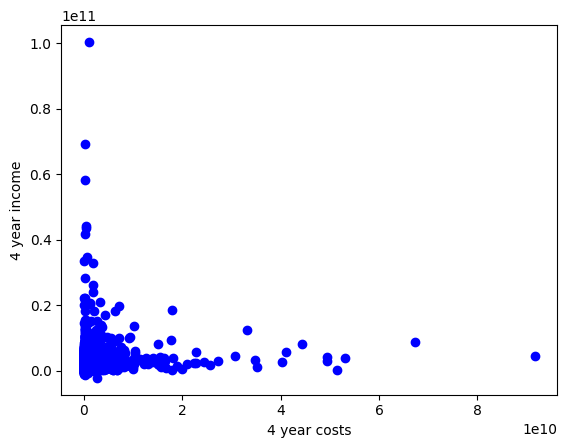

In [110]:
import matplotlib.pyplot as plt
plt.scatter(cost_income_imputed["4_year_costs"] , cost_income_imputed["4_year_income"] , c='b')
plt.xlabel("4 year costs")
plt.ylabel("4 year income")
plt.show()